<a href="https://colab.research.google.com/github/beelittlehoney/Deep-Learning/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [109]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [110]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [111]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


## 1. Tokenize the data

In [112]:
sentences = dataset['review'].tolist()
labels = dataset['rating'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [113]:
vocab_size = 1000
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = ""

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

## 2. Sequence the data

In [114]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

## 3. Pad the data

In [115]:
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## 4. Train a sentiment model

In [116]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_8      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [117]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2401 - loss: -0.4249 - val_accuracy: 0.5871 - val_loss: -1.7917
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2175 - loss: -5.4564 - val_accuracy: 0.5871 - val_loss: -4.8371
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2247 - loss: -13.0486 - val_accuracy: 0.5871 - val_loss: -9.9615
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2184 - loss: -26.1566 - val_accuracy: 0.5871 - val_loss: -17.5643
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2204 - loss: -43.9663 - val_accuracy: 0.5871 - val_loss: -28.5070
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2531 - loss: -65.9613 - val_accuracy: 0.5871 - val_loss: -43.7452
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2415 - loss: -102.5431 - val_accuracy: 0.5871 - val_loss: -63.9675
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2190 - loss: -156.1062 - val_

## Get files for visualing the network

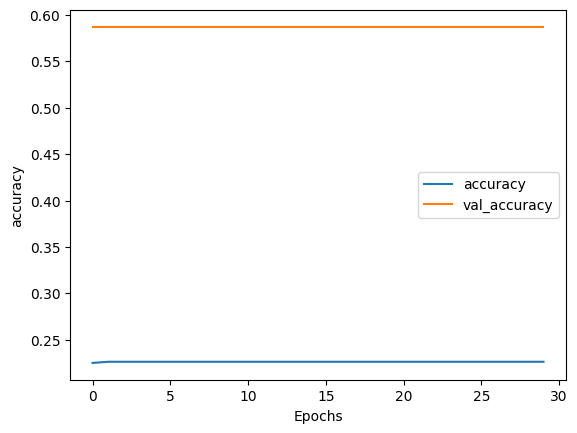

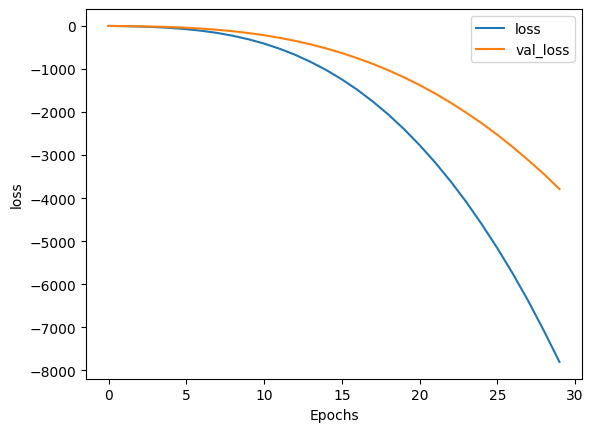

In [118]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [119]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1000, 16)


In [120]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [121]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5. Predict sentiment with new reviews

In [122]:
fake_reviews = [
  'Napakaganda ng produktong ito',
  'Bakit ang pangit ng dumating?',
  'Sumasang-ayon ako sa iyo']

print(fake_reviews)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

['Napakaganda ng produktong ito', 'Bakit ang pangit ng dumating?', 'Sumasang-ayon ako sa iyo']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Napakaganda ng produktong ito
[1.]


Bakit ang pangit ng dumating?
[1.]


Sumasang-ayon ako sa iyo
[1.]


